# PCA

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
import csv

In [2]:
filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
print(data.shape)
data


(1000, 2)


array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [3]:
#Step-1. Axis 0 indicates add the columns to calulate mean
print("Mean is", np.mean(data , axis = 0))
data_meaned = data - np.mean(data , axis = 0)
data_meaned

Mean is [4.075e-07 2.227e-07]


array([[ 0.14299959,  0.98492978],
       [-0.30467041,  0.98561978],
       [ 0.46624959, -0.84003022],
       ...,
       [ 6.10619959, -5.98640022],
       [-7.40940041, -5.52050022],
       [-0.12948041, -8.80360022]])

In [4]:
np.mean(data_meaned , axis = 0)

array([2.04558592e-17, 6.92779167e-17])

In [5]:
#Step-2
#covariance matrix implicitly involves centering of the data
covariance_matrix  = np.cov(data_meaned , rowvar = False)

In [6]:
covariance_matrix

array([[14.7809367 ,  0.80966871],
       [ 0.80966871, 16.87223563]])

In [7]:
#Step-3
eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)

In [8]:
eigen_values

array([14.50410886, 17.14906347])

In [9]:
eigen_vectors

array([[-0.9462227,  0.323516 ],
       [ 0.323516 ,  0.9462227]])

In [10]:
#Step-4
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [11]:
sorted_index

array([1, 0], dtype=int64)

In [12]:
sorted_eigenvalue

array([17.14906347, 14.50410886])

In [13]:
sorted_eigenvectors

array([[ 0.323516 , -0.9462227],
       [ 0.9462227,  0.323516 ]])

In [14]:
#Step-5
n_components = 1
p_components_req = sorted_eigenvectors[:,0:n_components]

#Explained Variance
#[sum of diagonal of the cov-matrix] = [sum of sorted eigen values]= 31.5(here).
# The [Sum diagonal of the covariance matrix] will give the complete variance across all the components.
# The below code will compute variance for single component.
# (1-0.54 = 0.46) is the variance accross the second component since only 2 components are present.
# Or 14.50410886/31.5 = 0.46 is the variance of the second component.
sum(sorted_eigenvalue[:n_components])/sum(sorted_eigenvalue) #17.14906347/(17.14906347+14.50410886 = 31.5)

0.5417802452885222

In [15]:
#Step-5
n_components = 2
p_components_req = sorted_eigenvectors[:,0:n_components]

#Explained Variance
sum(sorted_eigenvalue[:n_components])/sum(sorted_eigenvalue) # (17.14906347+14.50410886)/17.14906347+14.50410886)

1.0

In [16]:
p_components_req

array([[ 0.323516 , -0.9462227],
       [ 0.9462227,  0.323516 ]])

In [17]:
#Step-6
projected_data = np.dot(p_components_req.transpose() , data_meaned.transpose() ).transpose()

Text(0, 0.5, 'Y axis: Second principal component')

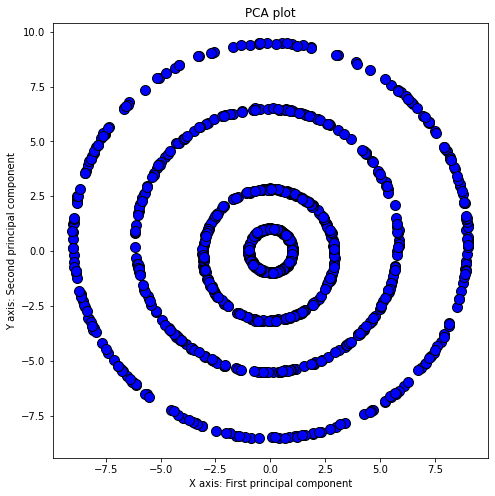

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(projected_data[:,0], projected_data[:,1], s=100, facecolor = 'b', edgecolors='k')
plt.gca().set_aspect("equal")
plt.xlabel("X axis: First principal component")
plt.title("PCA plot")
plt.ylabel("Y axis: Second principal component")